# Importing Libraries and Data 

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [16]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [17]:
# Define path

path = r'/Users/jacob/Desktop/Achievement 6'

In [18]:
# Import the data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'deaths_cases_gender copy.csv'), index_col = False)

In [6]:
df.shape

(3480820, 20)

In [7]:
df.head()

,Unnamed: 0,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,region,death_rate,cases_rate,month,year
0,1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
1,2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
2,3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
3,4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
4,5,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020


In [19]:
# Reset Index
df.reset_index(drop=True, inplace=True)
df.index = df.index + 1

In [20]:
# Dropping "Unnamed: 0" Column
df = df.drop('Unnamed: 0', axis=1)

In [21]:
df.head()

,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,region,death_rate,cases_rate,month,year
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
5,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020


In [22]:
# Dividing the column 'date' en 'month' and 'year' and adding this new columns to the dataframe
df['month'] = df['date'].str.split('-').str[1]  # month
df['year'] = df['date'].str.split('-').str[0]   # year

In [23]:
df.head()

,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,region,death_rate,cases_rate,month,year
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,01,2020
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,01,2020
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,01,2020
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,01,2020
5,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,01,2020


In [13]:
df = df.drop(columns=['region'])


In [14]:
# Exporting Merged dataframe
df.to_csv(os.path.join(path,'02 Data', 'Prepared Data','deaths_cases_gender.csv'))

In [24]:
#check the columns 
df.columns.to_list()

['county_code',
 'county',
 'state',
 'lat',
 'long',
 'date',
 'cases',
 'state_code',
 'deaths',
 'male',
 'female',
 'median_age',
 'population',
 'female_percentage',
 'region',
 'death_rate',
 'cases_rate',
 'month',
 'year']

In [100]:
#check for duplicates 
df_dups = df[df.duplicated()] 
df_dups
#no duplicates 

,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,region,death_rate,cases_rate,month,year


In [101]:
#check for missing values 
df.isnull().sum()
#no missign values 

county_code          0
county               0
state                0
lat                  0
long                 0
date                 0
cases                0
state_code           0
deaths               0
male                 0
female               0
median_age           0
population           0
female_percentage    0
region               0
death_rate           0
cases_rate           0
month                0
year                 0
dtype: int64

In [102]:
#check for mixed datatypes 
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)
#no mixed data types 

In [25]:
# Aggregate 
agg = {'population':'first',
      'female':'first',
      'male':'first',
      'deaths':'mean',
      'cases':'mean'}

In [27]:
#group data according to county 
df = df.groupby(['state','county']).agg(agg)

In [28]:
df.head(50)

population  female    male       deaths          cases
state   county                                                            
Alabama Autauga          55200   28326   26874   116.842738    8743.483811
        Baldwin         208107  106919  101188   371.443108   30520.345051
        Barbour          25782   12085   13697    56.131360    3165.921369
        Bibb             22527   10375   12152    61.532840    3540.172988
        Blount           57645   29211   28434   135.223867    8357.918594
        Bullock          10352    4689    5663    34.432007    1412.871415
        Butler           20025   10657    9368    76.221092    2901.297872
        Calhoun         115098   59783   55315   344.928770   18075.057354
        Chambers         33826   17569   16257   105.622572    4801.473636
        Cherokee         25853   13033   12820    47.390379    2738.606846
        Chilton          43930   22258   21672   115.793710    5888.938020
        Choctaw          13075    6822    6253    23.704903    1002.441258
        Clarke           24387   12848   11539    58.967623    4065.904718
        Clay             13378    6914    6464    50.441258    2197.766883
        Cleburne         14938    7657    7281    39.980574    1959.869565
        Coffee           51288   25974   25314   126.719704    7534.880666
        Colbert          54495   28420   26075   143.797410    8746.839038
        Conecuh          12514    6477    6037    38.374653    1599.664200
        Coosa            10855    5354    5501    30.887142    1544.721554
        Covington        37351   19179   18172   130.556892    5360.908418
        Crenshaw         13865    7051    6814    58.629047    2094.924144
        Cullman          82313   41753   40560   202.927845   13356.170213
        Dale             49255   25021   24234   130.820537    7107.102683
        Dallas           40029   21581   18448   142.811286    4783.242368
        DeKalb           71200   35896   35304   184.395930   10658.357077
        Elmore           81212   41762   39450   201.613321   13030.523589
        Escambia         37328   18261   19067    93.370028    5567.720629
        Etowah          102939   53288   49651   357.528215   16263.989824
        Fayette          16585    8415    8170    55.916744    2660.972248
        Franklin         31542   15940   15602    81.432007    5508.753932
        Geneva           26491   13520   12971    86.981499    3526.398705
        Greene            8426    4476    3950    32.183164    1087.456984
        Hale             14887    7868    7019    66.963922    2670.492137
        Henry            17124    8892    8232    42.823312    2557.864940
        Houston         104352   54323   50029   281.029602   14289.196115
        Jackson          52094   26558   25536   127.281221    8357.139685
        Jefferson       659892  347544  312348  1411.212766  102135.311748
        Lamar            13933    7133    6800    36.241443    2005.061980
        Lauderdale       92585   48270   44315   222.306198   12884.037003
        Lawrence         33171   17168   16003    92.490287    4073.696577
        Lee             159287   80915   78372   190.484736   21032.370953
        Limestone        93052   46625   46427   158.469010   13583.370953
        Lowndes          10236    5406    4830    49.888067    1591.445883
        Macon            19054   10264    8790    49.662350    2158.146161
        Madison         357560  182895  174665   525.411656   48106.956522
        Marengo          19538   10092    9446    63.629972    2925.169288
        Marion           29965   15067   14898    92.765957    4379.983349
        Marshall         95145   48168   46977   221.657724   15361.254394
        Mobile          414659  216731  197928   946.361702   60539.860315
        Monroe           21512   11282   10230    43.880666    2804.759482

In [29]:
# Convert the result to a new DataFrame
df = pd.DataFrame(df.reset_index())

In [34]:
# Remove categorical columns
df = df.drop(columns = ['male', 'female'])

In [43]:
#check columns in new dataframe 
df.columns.to_list()


['population', 'deaths', 'cases']

In [44]:
df

,population,deaths,cases
0,55200,116.842738,8743.483811
1,208107,371.443108,30520.345051
2,25782,56.131360,3165.921369
3,22527,61.532840,3540.172988
4,57645,135.223867,8357.918594
...,...,...,...
3215,44117,61.676226,5859.371878
3216,23059,9.115634,5192.401480
3217,20609,19.696577,3009.580944
3218,8129,25.625347,1271.482886


## The new dataframe contains the average total Cases and Deaths per county from all dates (2020 - 2023)

# 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [36]:
# Defining a range of potential numbers of clusters in the data 
# Choosing 1-10 like in the Exercise
num_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_clusters]

In [37]:
# After applying range, then apply k-means algorithm 
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
# This will output a list of scores 

/Users/jacob/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jacob/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jacob/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jacob/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [38]:
# List score
score

[-349372525518230.25,
 -168679443577097.2,
 -86888982743478.97,
 -46187559372613.72,
 -28546324242176.71,
 -17414988399261.05,
 -12125878198096.803,
 -8323490761820.463,
 -6404956449227.505]

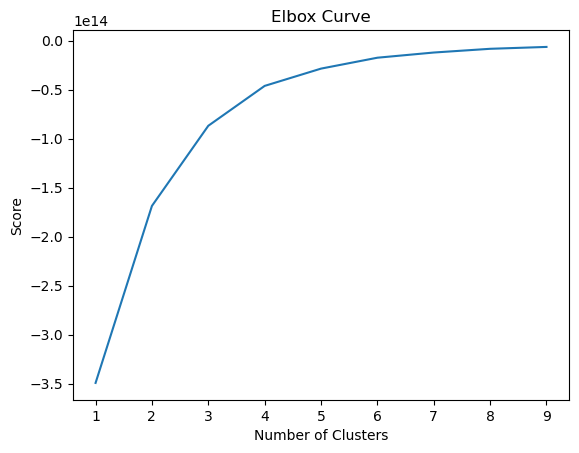

In [39]:
#plot the elbow curve 
pl.plot(num_clusters,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbox Curve')
pl.show()

# 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
- Explain why you chose that number in a markdown cell.
- If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.

I will be choosing the number 4. The values jump rapidly from 1 through 4, then plateaus after 4. This means the optimal count for clusters is 4. 

# 5. Run the k-means algorithm 

In [40]:
# Create the k-means object
kmeans = KMeans(n_clusters = 4)

In [41]:
# Fit kmeans object to dataframe 
kmeans.fit(df)

/Users/jacob/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

# 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [132]:
# Create column in dataframe with values corresponding to clusters 
df['clusters'] = kmeans.fit_predict(df)

/Users/jacob/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [133]:
# Check the dataframe to see the new column 
df.head()

,population,female,male,deaths,cases,clusters
0,55200,28326,26874,116.842738,8743.483811,0
1,208107,106919,101188,371.443108,30520.345051,0
2,25782,12085,13697,56.131360,3165.921369,0
3,22527,10375,12152,61.532840,3540.172988,0
4,57645,29211,28434,135.223867,8357.918594,0


In [134]:
# Count the clusers 
df['clusters'].value_counts()

clusters
0    3046
3     155
1      18
2       1
Name: count, dtype: int64

# 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

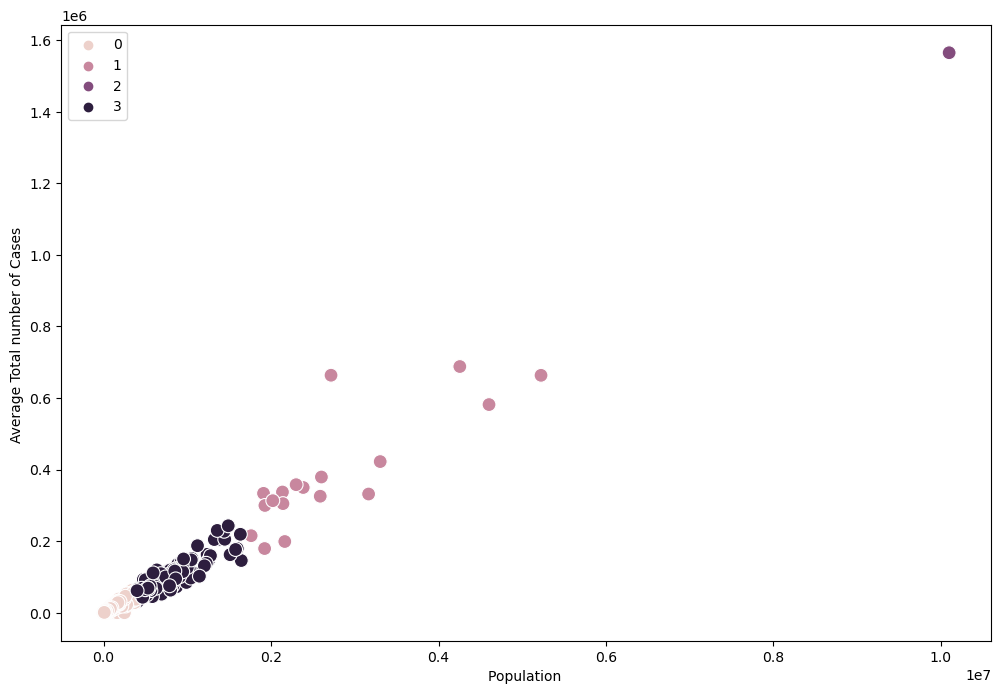

In [136]:
#plot population vs cases 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['population'], y=df['cases'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population ') # Label x-axis.
plt.ylabel('Average Total number of Cases ') # Label y-axis.
plt.show()

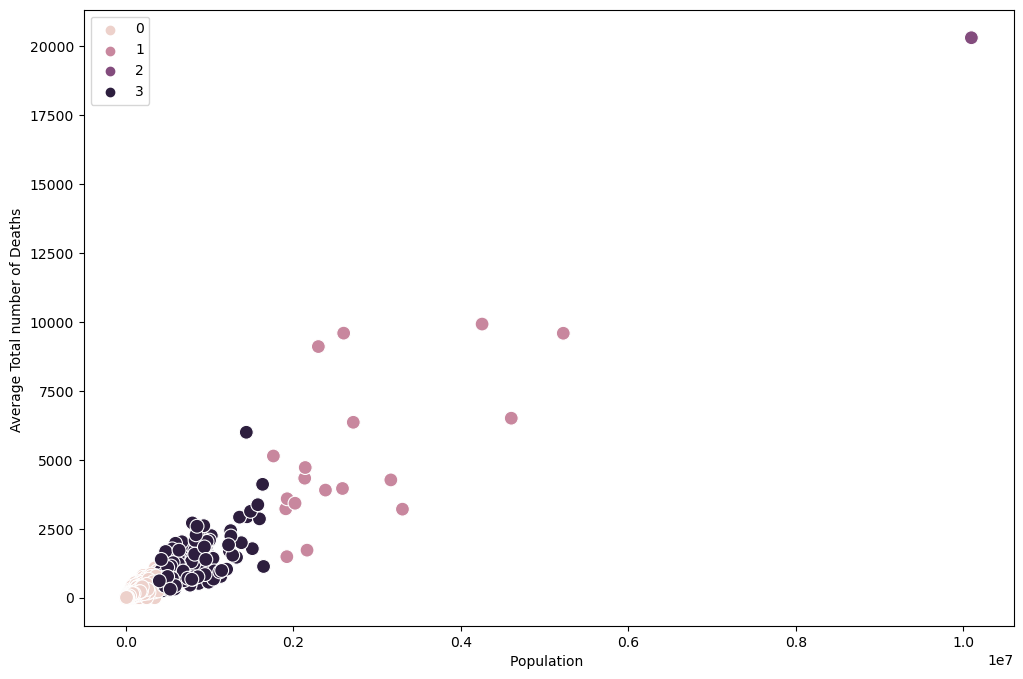

In [137]:
#plot population vs deaths

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['population'], y=df['deaths'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population ') # Label x-axis.
plt.ylabel('Average Total number of Deaths ') # Label y-axis.
plt.show()

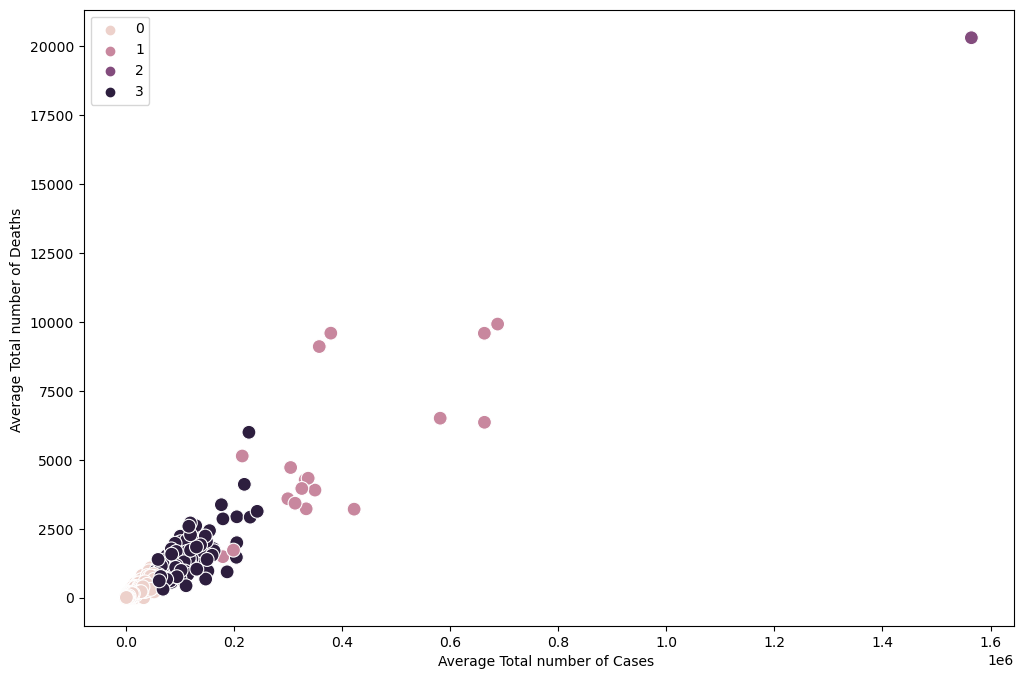

In [138]:
#plot cases vs deaths

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['cases'], y=df['deaths'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average Total number of Cases ') # Label x-axis.
plt.ylabel('Average Total number of Deaths ') # Label y-axis.
plt.show()

# 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
There are 4 distinct clusters that were selected from the elbow technique. The first group (0) are mostly counties with small populations and low cases and deaths. The second group (3) consist of counties with populations less than 2 million with total cases less than 500 thousand and total deaths less than 5,000. The third group (1) consist of counties with populations between 2 to 6 million. This group has 400 thousand and 800 thousand cases and between 7500 - 15000 deaths. The third group (2) only has one observation. This county has the largest population of around 10,000,000. It has around 3.5 million total cases and 35,000 recorded deaths. This data makes sense as there are a wide range of population sizes in America. Some counties are very small while others can have millions of residents. 

# 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.


In [139]:
#create a column that renames the clusters to colors 
df.loc[df['clusters'] == 3, 'cluster'] = 'black'
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [141]:
df.groupby('cluster').agg({
    'population':['mean','median'],
    'cases':['mean','median'],
    'deaths':['mean','median']
})

population                     cases                \
                     mean      median          mean        median   
cluster                                                             
black        7.477336e+05    684017.0  9.666499e+04  8.461486e+04   
dark purple  1.009805e+07  10098052.0  1.564477e+06  1.564477e+06   
pink         4.963316e+04     23884.5  6.525593e+03  3.142215e+03   
purple       2.728367e+06   2340899.5  3.857647e+05  3.353783e+05   

                   deaths                
                     mean        median  
cluster                                  
black         1262.575548   1028.072155  
dark purple  20290.854764  20290.854764  
pink            89.714309     47.592507  
purple        5222.674170   4299.530990

The pink cluster (0) has low population counties with an average of 50.000 residents. It has an average total cases of around 6.500 and average total deaths of around  100.

The black cluster (3) has middle population sized counties with an average of around 750.000 residents. It has an average total cases of around 100.000 and 1300 average total deaths. 

The purple cluster (1) has large populated counties. The average population is 2.7 million. The average total cases is around 340.000 cases and the average total deaths is 5.300. 

The dark purple cluster (2) contains only one county. The county has a population of around 10.000.000 residents. The average total cases is around 1.6 million and the average total deaths is 20.300. 

Interestingly, each cluster is ~10X times greater/lower than its neighboring cluster. For instance, the pink cluster has a total population that is less than 10x of the purple cluster population. 


# 10. Propose what these results could be useful for in future steps of an analytics pipeline.
Rather than there being three distinct population sizes (example: small, medium, and large), there are 4 distinct population sizes per county. It may be interesting to further analysis on states rather than counties. Also, it would be interesting to creating a scatter plot like those above, but the color coordination comes from U.S.A regions (South, Midwest, Northeast, West). This may give insight if regions follow the cluster pattern. 